## In_Class_Exercise- 03/11/2024

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

import pandas as pd
import seaborn as sns

#### Dataset Preparation: Use the california housing dataset available in scikit-learn

In [2]:
data=fetch_california_housing()
X=data.data
y=data.target
#data

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Explore data Analysis : check for null values, and visualise some features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
Null values in the dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


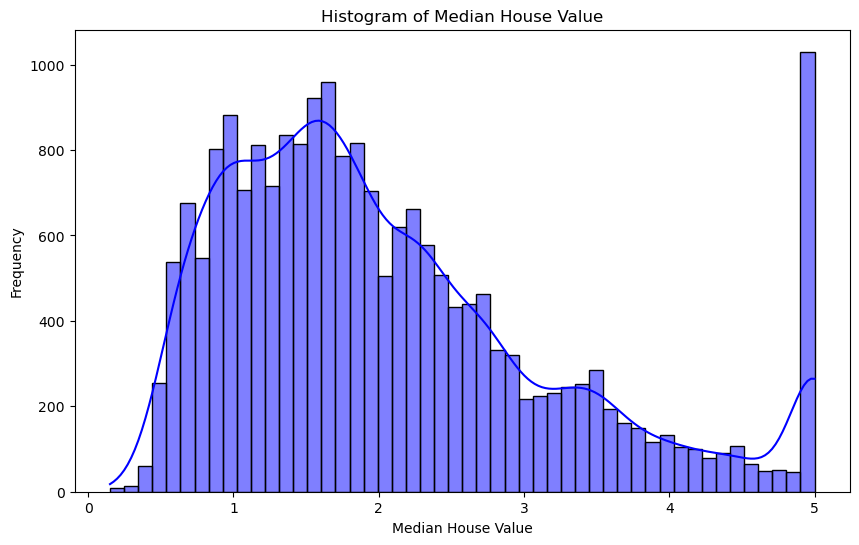

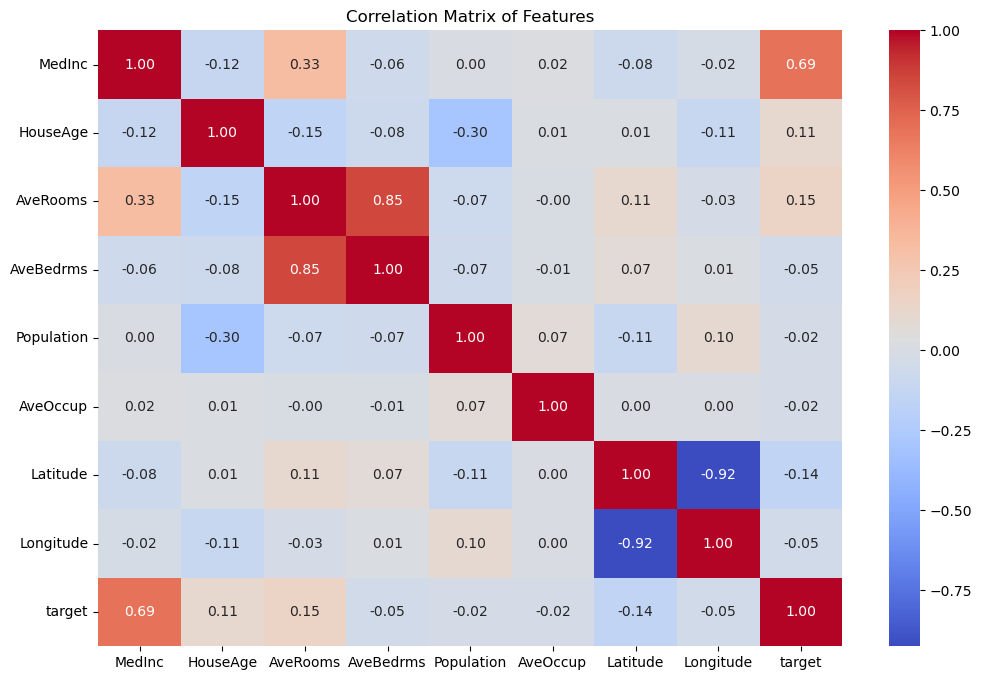

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.info())

# Check for null values
print("Null values in the dataset:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(df['target'], bins=50, kde=True, color='blue')
plt.title('Histogram of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

#### Train a LinearRegression Model

Mean Squared Error: 0.5558915986952422
R-squared: 0.5757877060324524


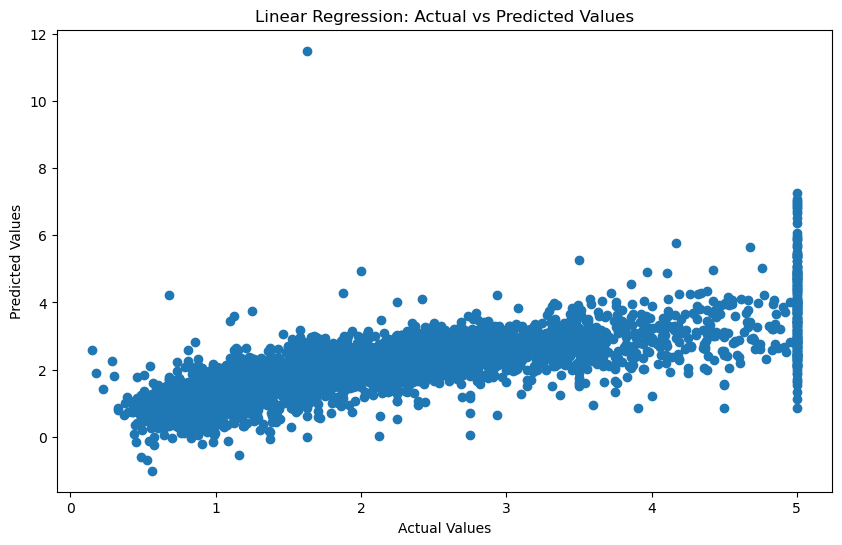

In [5]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.show()

#### Evaluate the model using 5-fold cross-validation

In [6]:
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

cv_mse_mean = -cv_scores.mean()

print("Cross-Validated Mean Squared Error:", cv_mse_mean)

Cross-Validated Mean Squared Error: 0.5305724639238878


#### Try other regression models to improve the performance

In [ ]:
# Models to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='linear')
}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    
    # Convert negative MSE to positive and calculate the mean
    cv_mse_mean = -cv_scores.mean()
    
    # Print the results
    print(f"{model_name}: Cross-Validated Mean Squared Error - {cv_mse_mean:.4f}")


Linear Regression: Cross-Validated Mean Squared Error - 0.5306
Ridge Regression: Cross-Validated Mean Squared Error - 0.5306
Lasso Regression: Cross-Validated Mean Squared Error - 0.9521
Random Forest: Cross-Validated Mean Squared Error - 0.2535
